In [5]:
s = '1000000011110'
from qiskit import *

In [6]:
n = len(s)
circuit = QuantumCircuit(n+1,n)

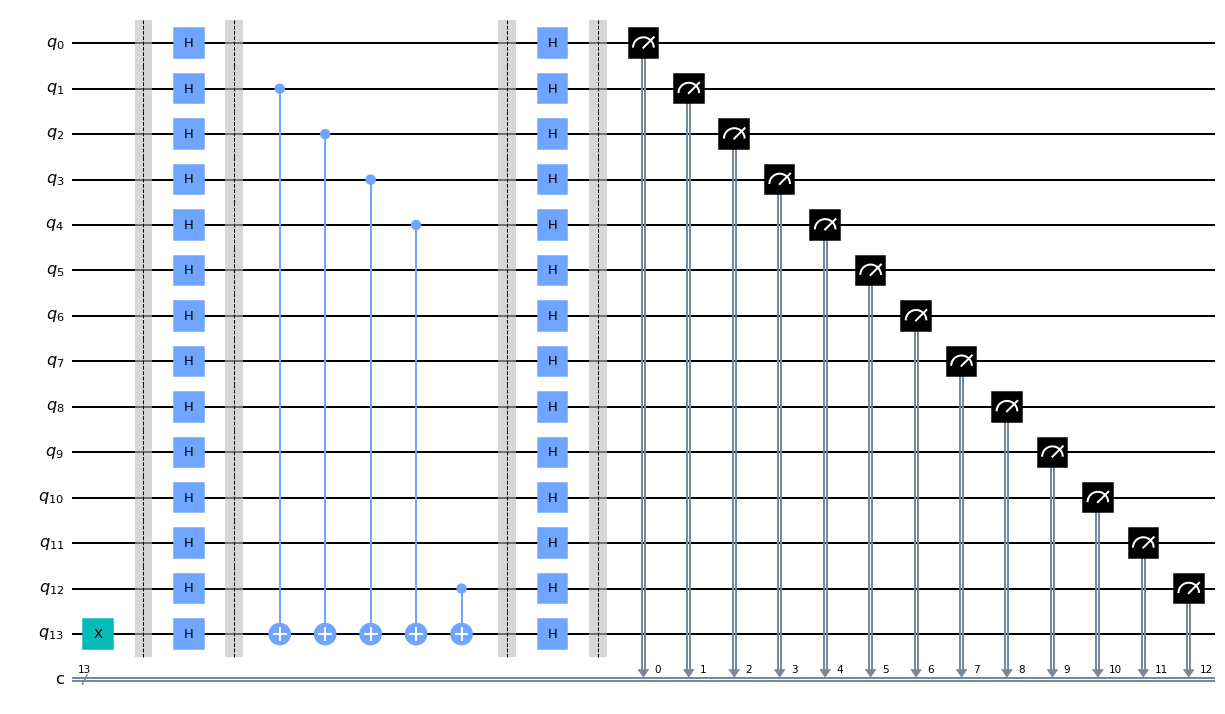

In [7]:
# step 0
circuit.x(n) #  the n+1qubits are indexed 0...n, so that the last qubit is index n
circuit.barrier() #just a visual aid for now
# step 1
circuit.h(range(n+1)) # range n+1 returns [0,1,2,3,4,....,n] in Python This covers all qubits
circuit.barrier()
#step 2
for ii, yesno in enumerate(reversed(s)):
    if yesno == '1':
        circuit.cx(ii, n)
circuit.barrier()#just a visual aid
#step 3
circuit.h(range(n+1))
circuit.barrier()
circuit.measure(range(n), range(n))# measure the qubits indexed from 0 to n-1 and store them into the classical bits indexed 0 to n-1
%matplotlib inline
circuit.draw(output='mpl')

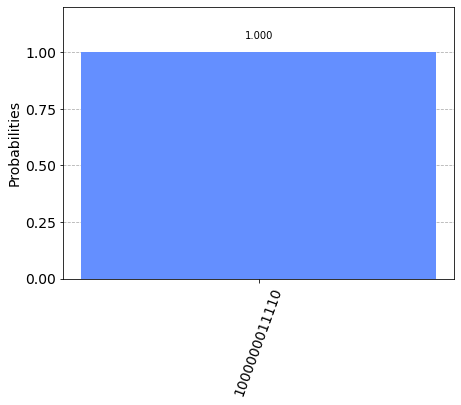

In [9]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

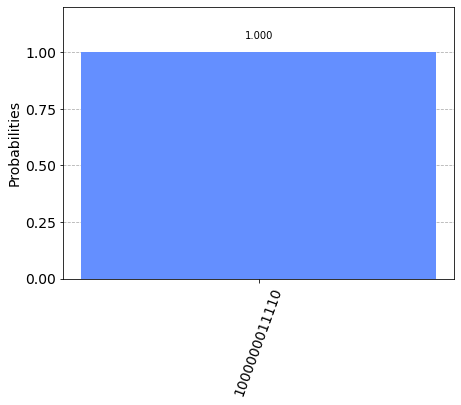

In [10]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=100).result()
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))